In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Objetivo del Modelo Predictivo
El objetivo de RR-HH es desarrollar un modelo que pueda predecir la probabilidad de que un empleado se vaya de la empresa. Este modelo será útil para identificar patrones y factores que contribuyen a la rotación de empleados, permitiendo a la empresa tomar medidas proactivas para retener talento.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Análisis EDA
El análisis exploratorio de datos (EDA) es una etapa crucial en el análisis de datos porque ayuda a entender la estructura y las características principales del dataset. A través del EDA, podemos identificar patrones, detectar anomalías, y resumir las principales características de los datos. Este proceso es fundamental para preparar los datos para análisis más avanzados, como la modelización predictiva. El EDA incluye el uso de estadísticas descriptivas y visualizaciones para explorar y comprender mejor los datos.

In [4]:
# verificamos que tipo de dato es cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Análisis de la Variable MaritalStatus
La variable MaritalStatus representa el estado civil de cada trabajador. Es importante entender los valores únicos de esta variable para analizar cómo el estado civil puede influir en la rotación de empleados.

In [5]:
# verificamos valores unicos del estado civil de cada trabajador
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### Verificación de Valores Nulos
Antes de proceder con el análisis exploratorio de datos, es importante verificar si existen valores nulos en el dataset. La presencia de valores nulos puede afectar la calidad del análisis y la precisión de los modelos predictivos.

In [6]:
# verificamos si hay datos nulos
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

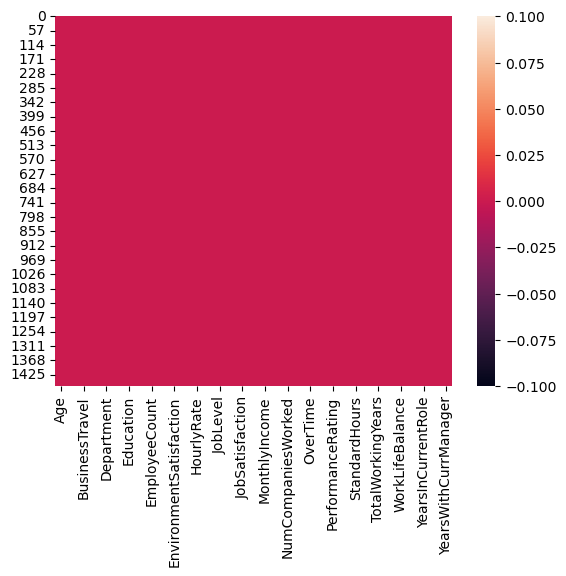

In [7]:
array(['Single', 'Married', 'Divorced'], dtype=object)

### Transformación de la Variable Attrition
#### Valores Únicos de la Variable Attrition
La variable Attrition es nuestra variable objetivo o dependiente en este análisis. Recursos Humanos (RR-HH) desea crear un modelo predictivo que determine si un empleado se va a ir o se va a quedar en la empresa, así como la probabilidad de que se vaya.

Para entender mejor la variable Attrition, primero examinamos sus valores únicos:

In [8]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
def transformar(x):
  if x == 'Yes':
    return 1
  else:
    return 0

In [10]:
# Transformación de la variable attrition categorica a numérica los yes los sustituimos 
# por 1 y el resto por 0
df.Attrition = df.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)
#df.Attrition = df.Attrition.apply(transformar())

In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Separación de la Variable Dependiente
#### Definición de la Variable Dependiente (y)
En el proceso de modelización predictiva, es crucial separar la variable dependiente (objetivo) del resto de las variables independientes (predictoras). En este caso, la variable dependiente es Attrition, que indica si un empleado ha dejado la empresa (1) o se ha quedado (0).

In [12]:
#Separación de variable dependiente
y = df.Attrition
df = df.drop(['Attrition'], axis = 1)

In [13]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


### Identificación de Variables Irrelevantes
En el proceso de análisis exploratorio de datos (EDA), es importante identificar y eliminar las variables que no aportan información relevante al modelo predictivo. Estas variables pueden introducir ruido y afectar la precisión del modelo. En este caso, hemos identificado tres variables candidatas a ser eliminadas: EmployeeCount, StandardHours y Over18.

In [14]:
# variables candidatas a ser eliminadas porque los datos no son relevantes y pueden ensuciar nuestro modelo
df.EmployeeCount.unique()

array([1], dtype=int64)

In [15]:
# variables candidatas a ser eliminadas porque los datos no son relevantes y pueden ensuciar nuestro modelo
df.StandardHours.unique()

array([80], dtype=int64)

In [16]:
# variables candidatas a ser eliminadas porque los datos no son relevantes y pueden ensuciar nuestro modelo
df.Over18.unique()

array(['Y'], dtype=object)

### Visualización de la Distribución de Variables Numéricas
#### Creación de Histogramas
Para entender mejor la distribución de las variables numéricas en nuestro dataset, creamos histogramas para cada columna numérica. Los histogramas son una herramienta útil para visualizar la distribución de los datos y detectar posibles patrones, anomalías o valores atípicos.

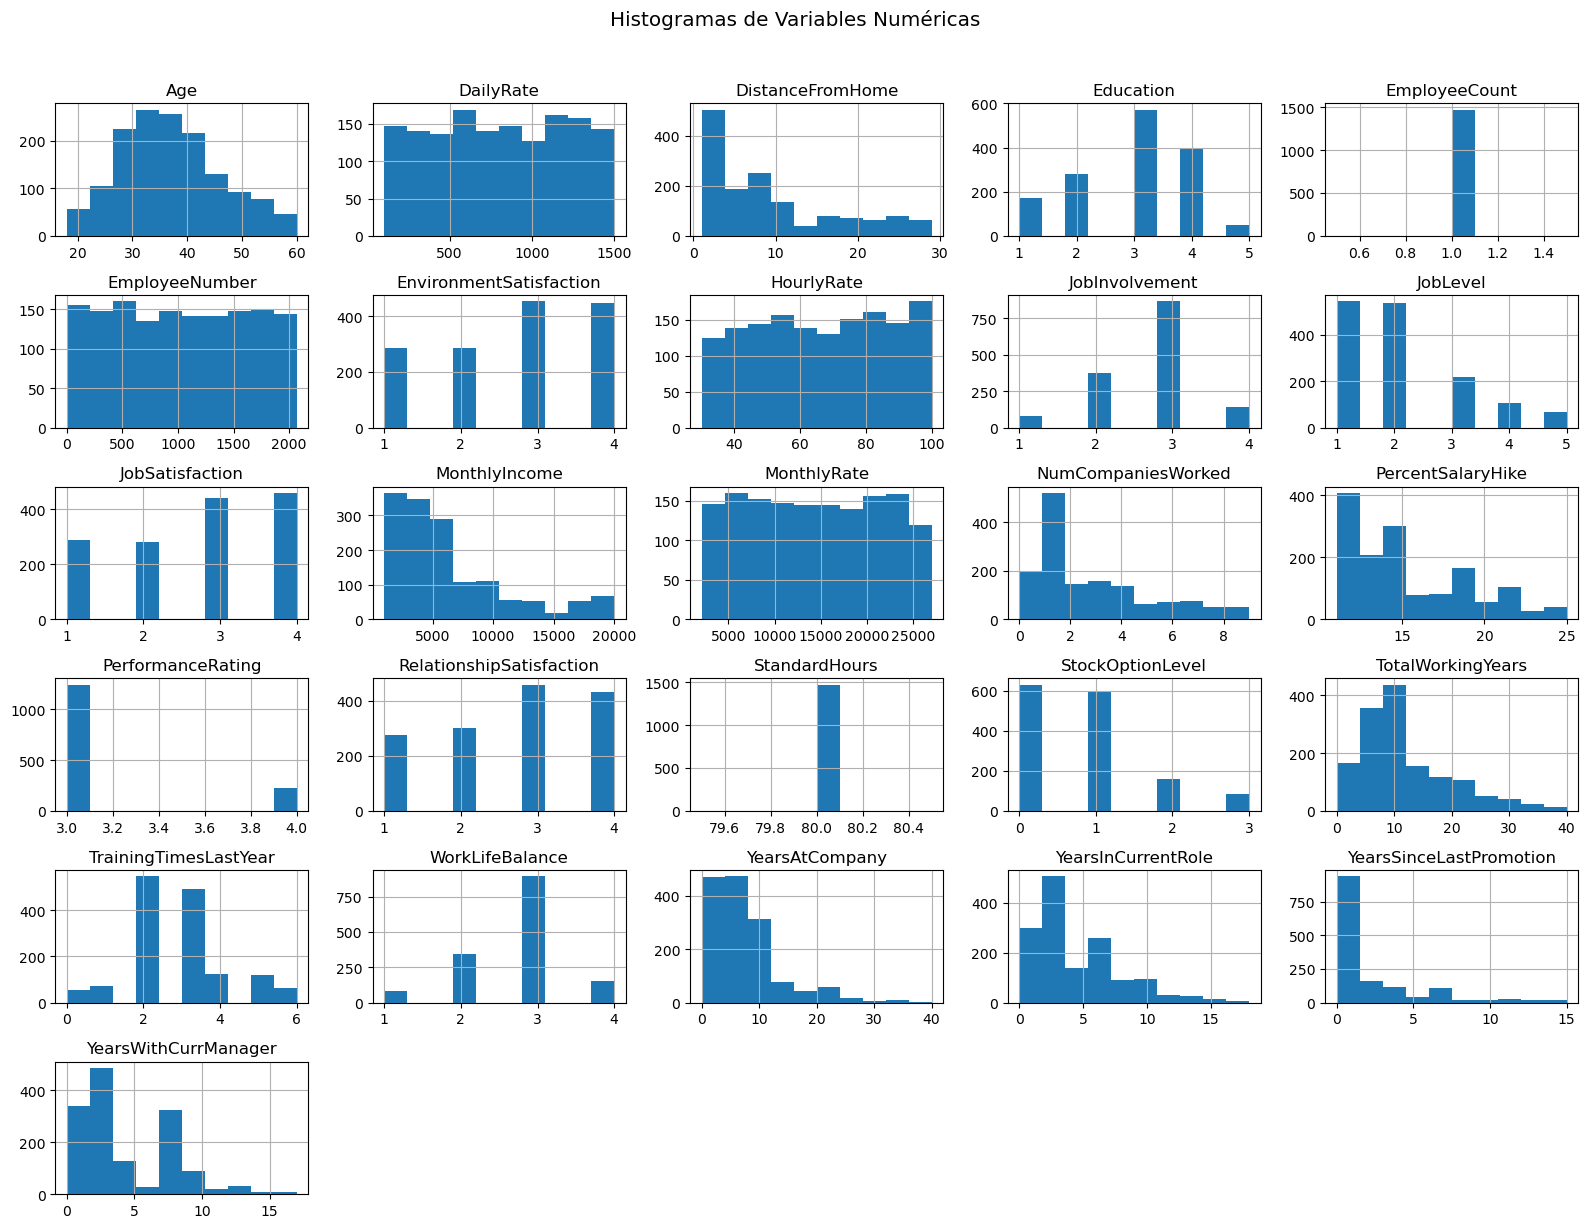

In [17]:
# Creamos histogramas para cada columna numérica
# los histogramas nos ayudan a entender la distribucion de nuestros datos
df.hist(bins=10, figsize=(16, 12))
plt.suptitle('Histogramas de Variables Numéricas', x=0.5, y=1.02, ha='center', fontsize='x-large')

# Añadimos el ajuste automático de disposición para evitar superposiciones de títulos
plt.tight_layout()
plt.show()

### Análisis de los Histogramas
Los histogramas generados nos permiten observar la distribución de cada variable numérica en el dataset. A continuación, se presentan algunos puntos clave que podemos analizar:

#### Distribución de Edad (Age):

Observamos cómo se distribuyen las edades de los empleados. Podemos identificar si hay una concentración de empleados en ciertos rangos de edad.

#### Distribución de Ingresos Mensuales (MonthlyIncome):

Analizamos la distribución de los ingresos mensuales para detectar posibles desigualdades o patrones en los salarios.

#### Distribución de Años en la Empresa (YearsAtCompany):

Observamos la distribución de los años que los empleados han estado en la empresa, lo cual puede proporcionar información sobre la antigüedad y la retención de empleados.

#### Distribución de Horas de Trabajo Diarias (DailyRate):

Analizamos la distribución de las horas de trabajo diarias para entender mejor los patrones de trabajo de los empleados.

### Eliminación de Variables Irrelevantes
Identificación de Variables a Eliminar
En el proceso de análisis exploratorio de datos (EDA), hemos identificado varias variables que no aportan información relevante al modelo predictivo. Estas variables pueden introducir ruido y afectar la precisión del modelo. Las variables candidatas a ser eliminadas son:

EmployeeNumber
EmployeeCount
StandardHours
Over18

In [18]:
#eliminamos las variables ya mencionadas
variables_a_eliminar = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']

In [19]:
df.drop(variables_a_eliminar, axis = 1, inplace = True)

In [20]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


### Transformación de Variables Categóricas

#### Transformación de la Variable OverTime
La variable OverTime indica si un empleado trabaja horas extras (Yes) o no (No). Para facilitar el análisis y la modelización, transformamos esta variable de categórica a numérica, sustituyendo los valores Yes por 1 y los valores No por 0.

In [21]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df.OverTime = df.OverTime.apply(lambda x: 1 if x == 'Yes' else 0)

#### Transformación de la Variable BusinessTravel
La variable BusinessTravel indica la frecuencia de viajes de negocios de un empleado. Los valores únicos de esta variable son Travel_Rarely, Travel_Frequently y Non-Travel. Para facilitar el análisis y la modelización, transformamos esta variable utilizando codificación one-hot (one-hot encoding).

In [23]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [24]:
Travel_Rarely = [1,0,0]
Travel_Frequently = [0,1,0]
Non_Travel = [0,0,1]


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
      

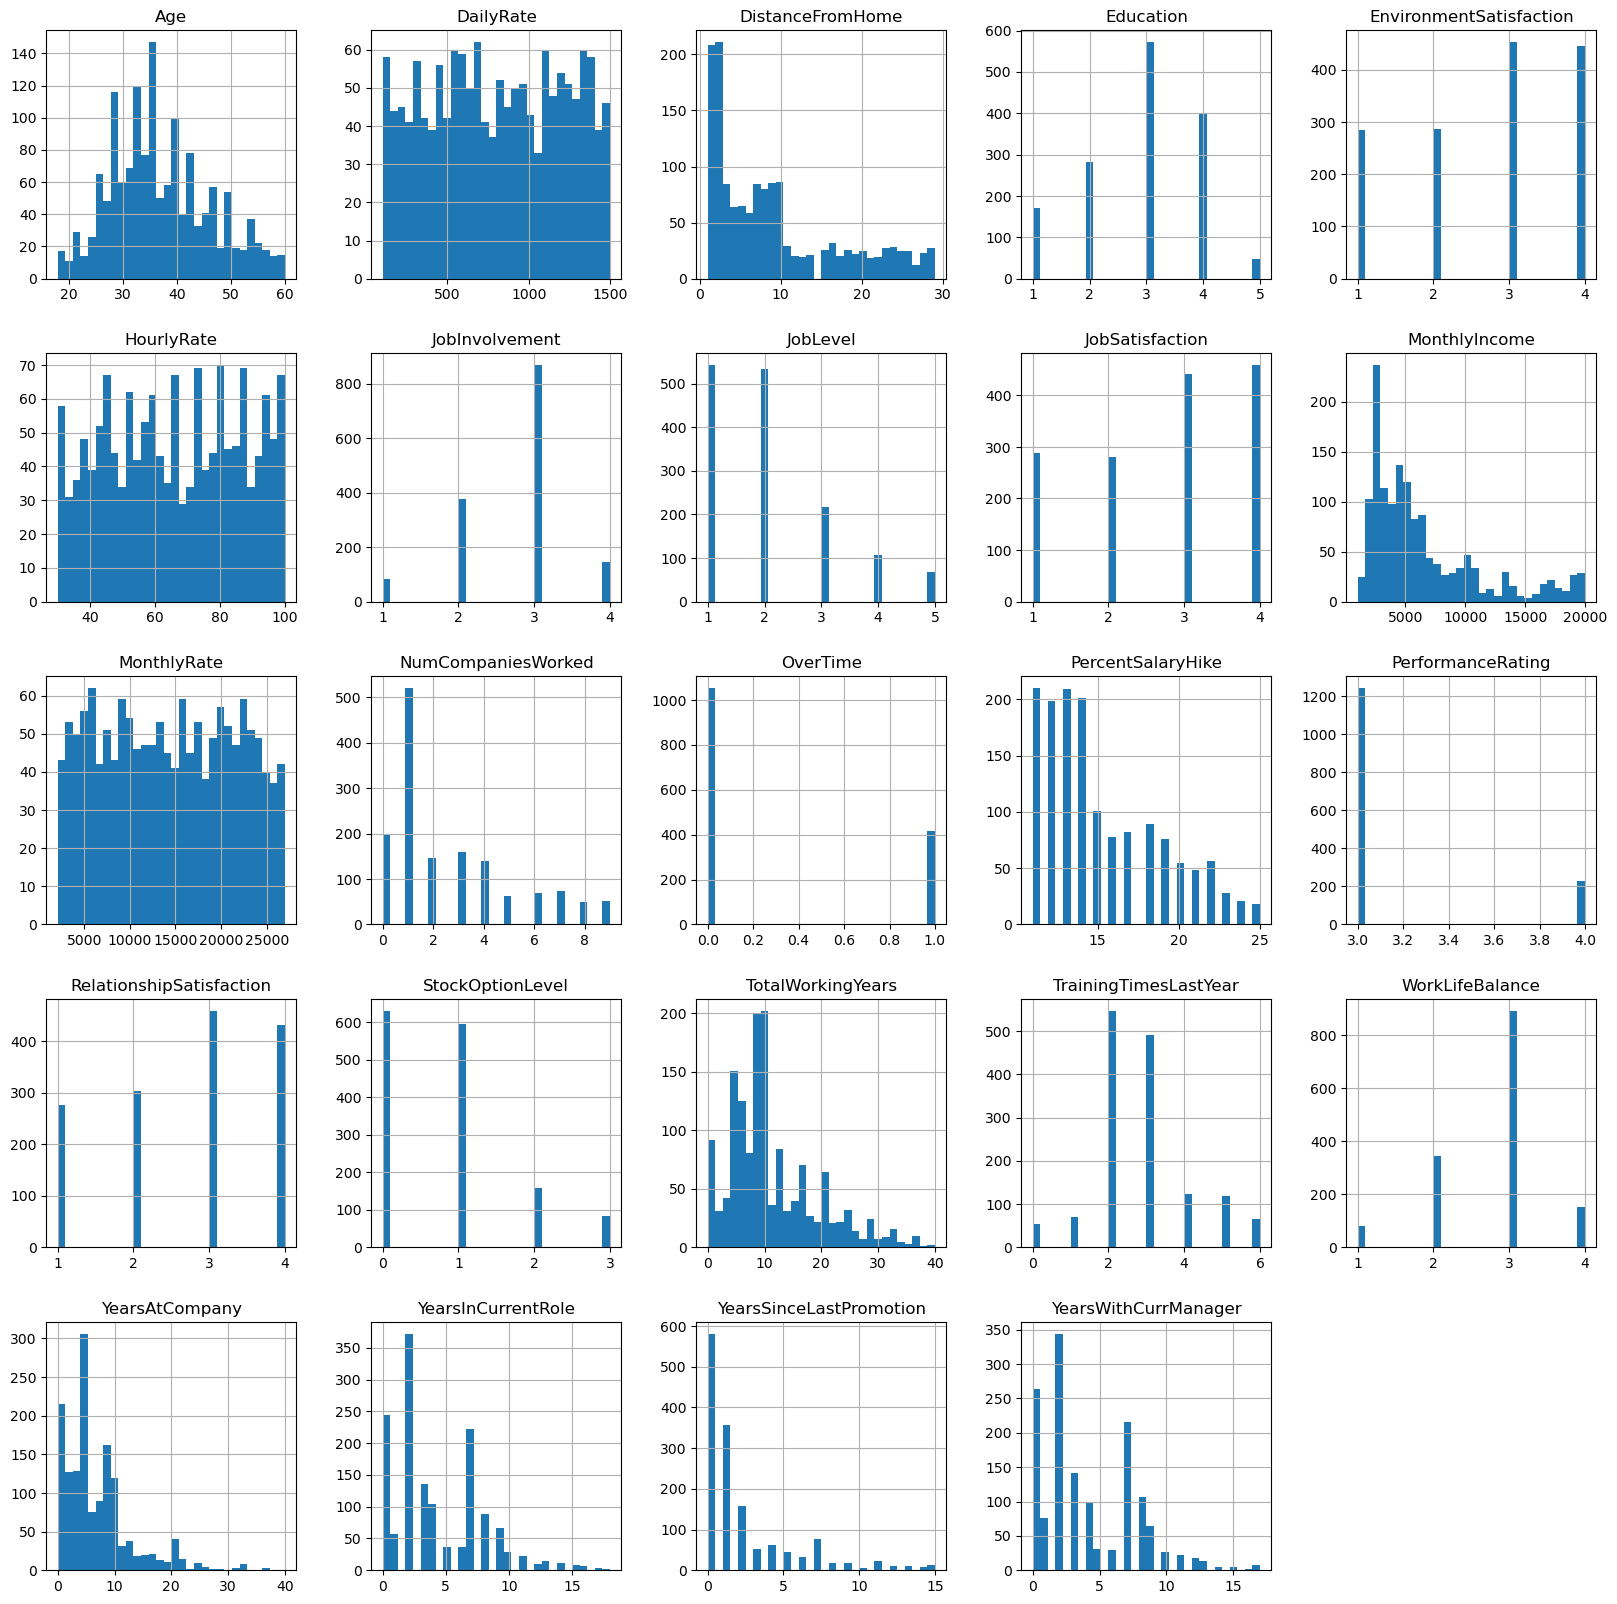

In [25]:
df.hist(bins = 30, figsize = (20,20))

El conjunto de datos refleja que la mayoría de los empleados se concentra en edades jóvenes-adultas (25 a 40 años) y con poca antigüedad en la empresa, tanto en el puesto actual como bajo el mismo gerente. Los ingresos mensuales muestran una fuerte concentración en los rangos bajos, con pocos casos de salarios altos.

En cuanto a desempeño, casi todos los empleados tienen calificación media (3), con pocos en nivel alto (4). El porcentaje de incremento salarial suele ubicarse entre 10% y 15%. La mayoría no realiza horas extra, aunque existe un grupo relevante que sí lo hace.

Las variables categóricas como satisfacción laboral, balance vida-trabajo, involucramiento y opciones de acciones presentan distribuciones heterogéneas, con una mayor concentración en niveles intermedios.

En resumen, el perfil predominante es de empleados jóvenes, con poca trayectoria en la empresa, ingresos relativamente bajos y evaluaciones de desempeño estandarizadas, lo que sugiere oportunidades de mejora en retención, desarrollo profesional y motivación.

In [26]:
# analisis descritivo de nuestras variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


### Interpretación de las Estadísticas Descriptivas
#### Tendencia Central:

La edad promedio de los empleados es de 36,9 años, lo que refleja una plantilla mayoritariamente joven-adulta.

El ingreso mensual promedio es de 6.502, con una mediana de 4.919, lo que indica que la mayoría gana por debajo del promedio, ya que algunos salarios muy altos elevan la media.

La experiencia laboral total promedio es de 11,2 años, mientras que el tiempo en la empresa es de 7 años, sugiriendo cierta estabilidad laboral.

#### Dispersión:

Variables como MonthlyIncome y MonthlyRate muestran alta dispersión, lo que sugiere grandes diferencias salariales entre empleados.

La variable YearsAtCompany también presenta un rango amplio (0 a 40 años), aunque la mayoría tiene menos de 10.

La desviación estándar de NumCompaniesWorked (2,49) refleja trayectorias laborales diversas, desde quienes nunca cambiaron de empleo hasta quienes trabajaron en varias empresas.

#### Observaciones Relevantes

Casi todos los empleados tienen PerformanceRating = 3, con muy poca variabilidad.

Las variables de satisfacción (JobSatisfaction, RelationshipSatisfaction, EnvironmentSatisfaction, WorkLifeBalance) tienden a valores intermedios (2–3), lo que indica percepciones mixtas.

El OverTime muestra que un 28% de empleados realiza horas extra, lo cual podría estar relacionado con el equilibrio vida-trabajo.

El tiempo desde el último ascenso es bajo (mediana = 1 año), aunque con algunos casos extremos de hasta 15 años.

En síntesis: la mayoría de los empleados son jóvenes-adultos, con salarios moderados, estabilidad relativa en la empresa y percepciones de satisfacción intermedia. Sin embargo, se observan desigualdades salariales y trayectorias laborales heterogéneas que pueden influir en la retención y motivación.


### Modelo Predictivo de Permanencia Laboral

Se desarrolló un modelo de clasificación binaria con el objetivo de predecir si un empleado permanecerá en la empresa o decidirá abandonarla. El modelo recibe como entrada un conjunto de variables individuales (edad, salario, nivel de satisfacción, años en la compañía, entre otras) y devuelve un resultado categórico:

0: el empleado se queda en la compañía.

1: el empleado abandona la compañía.

Para facilitar la interpretación, se definió la clase 0 como los empleados que permanecen en la organización. De esta manera, al obtener una predicción con valor 0, se interpreta que el colaborador continuará en la empresa, mientras que un valor 1 indica riesgo de rotación.

In [27]:
df_quedan = df[y == 0]

In [28]:
df_quedan

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,...,3,3,0,8,2,2,7,7,3,6
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [29]:
df_abandonan = df[y == 1]

In [30]:
df_abandonan

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
14,28,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,...,3,2,0,6,4,3,4,2,0,3
21,36,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,...,4,2,0,10,4,3,5,3,0,3
24,34,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,...,3,1,1,1,3,2,1,0,1,0
1442,29,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,36,...,3,2,3,4,3,4,2,2,2,2
1444,56,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,72,...,3,4,1,14,4,1,10,9,9,8
1452,50,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,94,...,3,4,2,12,3,3,6,3,0,1


In [31]:
len(df_quedan)

1233

In [32]:
len(df_abandonan)

237

In [33]:
len(df)

1470

In [34]:
# convertir a porcentaje la cantidad que se quedan y los que se van
pcj_q = len(df_quedan)/len(df) * 100 # porcentaje los que se quedan
pcj_a = len(df_abandonan)/len(df) * 100 # porcentaje los que se abandonan

In [35]:
# porcentaje de los que abandonan
pcj_a

16.122448979591837

In [36]:
# porcentaje de los que se quedan
pcj_q

83.87755102040816

### Distribución de la Permanencia

Del total de 1.470 empleados analizados:

1.233 empleados (83,9%) permanecen en la compañía.

237 empleados (16,1%) han abandonado la compañía.

Estos porcentajes reflejan que la mayoría de la plantilla tiende a permanecer en la organización, aunque existe un grupo significativo que representa un riesgo de rotación.

### Perfiles de Empleados

In [37]:
# muestro un detalle de las variables de los que se quedan
df_quedan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0


#### Perfil de los Empleados que Permanecen

Los empleados que permanecen en la empresa presentan las siguientes características:

**Edad promedio:** 37,6 años, con un rango entre 18 y 60 años.

**Ingresos:** salario mensual promedio de 6.833, con mediana de 5.204, lo que indica que la mayoría gana por debajo del promedio debido a algunos valores elevados.

**Antigüedad:** tiempo promedio en la empresa de 7,4 años, mientras que la experiencia laboral total es de 11,9 años.

**Roles y niveles:** la mayoría se ubica en niveles intermedios de puesto (JobLevel ≈ 2,1).

**Horas extra:** solo el 23% realiza horas adicionales, en menor medida que el grupo que abandona.

**Satisfacción:** los valores de satisfacción laboral, balance vida-trabajo y relación con superiores se concentran en niveles medios (≈ 2–3 en escala de 1 a 4).

**Promociones:** el tiempo desde la última promoción es bajo (mediana de 1 año), aunque con casos que llegan a 15 años.

En resumen, los empleados que permanecen suelen ser adultos con experiencia laboral moderada, ingresos medios, estabilidad relativa en la empresa y percepciones de satisfacción intermedia. Estos factores parecen estar asociados con la decisión de continuar en la organización.

In [38]:
df_abandonan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0
MonthlyIncome,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


#### Perfil de los Empleados que Abandonan

Los empleados que dejan la empresa presentan las siguientes características:

**Edad promedio:** 33,6 años, menor que la de quienes permanecen (37,6), lo que indica que la rotación es más alta entre empleados jóvenes.

**Ingresos:** salario mensual promedio de 4.787, con mediana de 3.202, significativamente más bajo que el grupo que permanece.

**Antigüedad:** tiempo promedio en la empresa de 5,1 años y experiencia laboral total de 8,2 años, valores inferiores al grupo de permanencia.

**Roles y niveles:** se concentran más en niveles bajos (JobLevel ≈ 1,6 frente a 2,1 en los que permanecen).

**Horas extra:** el 53% realiza horas adicionales, más del doble que el grupo que permanece (23%), lo cual puede afectar la satisfacción y balance vida-trabajo.

**Satisfacción:** niveles de satisfacción en el trabajo y con el ambiente son ligeramente inferiores (≈ 2,4 en escala de 1 a 4).

**Promociones:** tiempo desde el último ascenso similar (mediana de 1 año), pero con más casos sin promoción desde el ingreso.

#### Conclusión Comparativa

En general, los empleados que abandonan tienden a ser más jóvenes, con menor antigüedad, salarios más bajos, menor nivel de puesto, mayor carga de horas extra y satisfacción algo más baja. Estos factores parecen estar asociados a un mayor riesgo de rotación.

In [39]:
correlacion = df.corr()

C:\Users\pim\AppData\Local\Temp\ipykernel_11164\3266838018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


<Axes: >

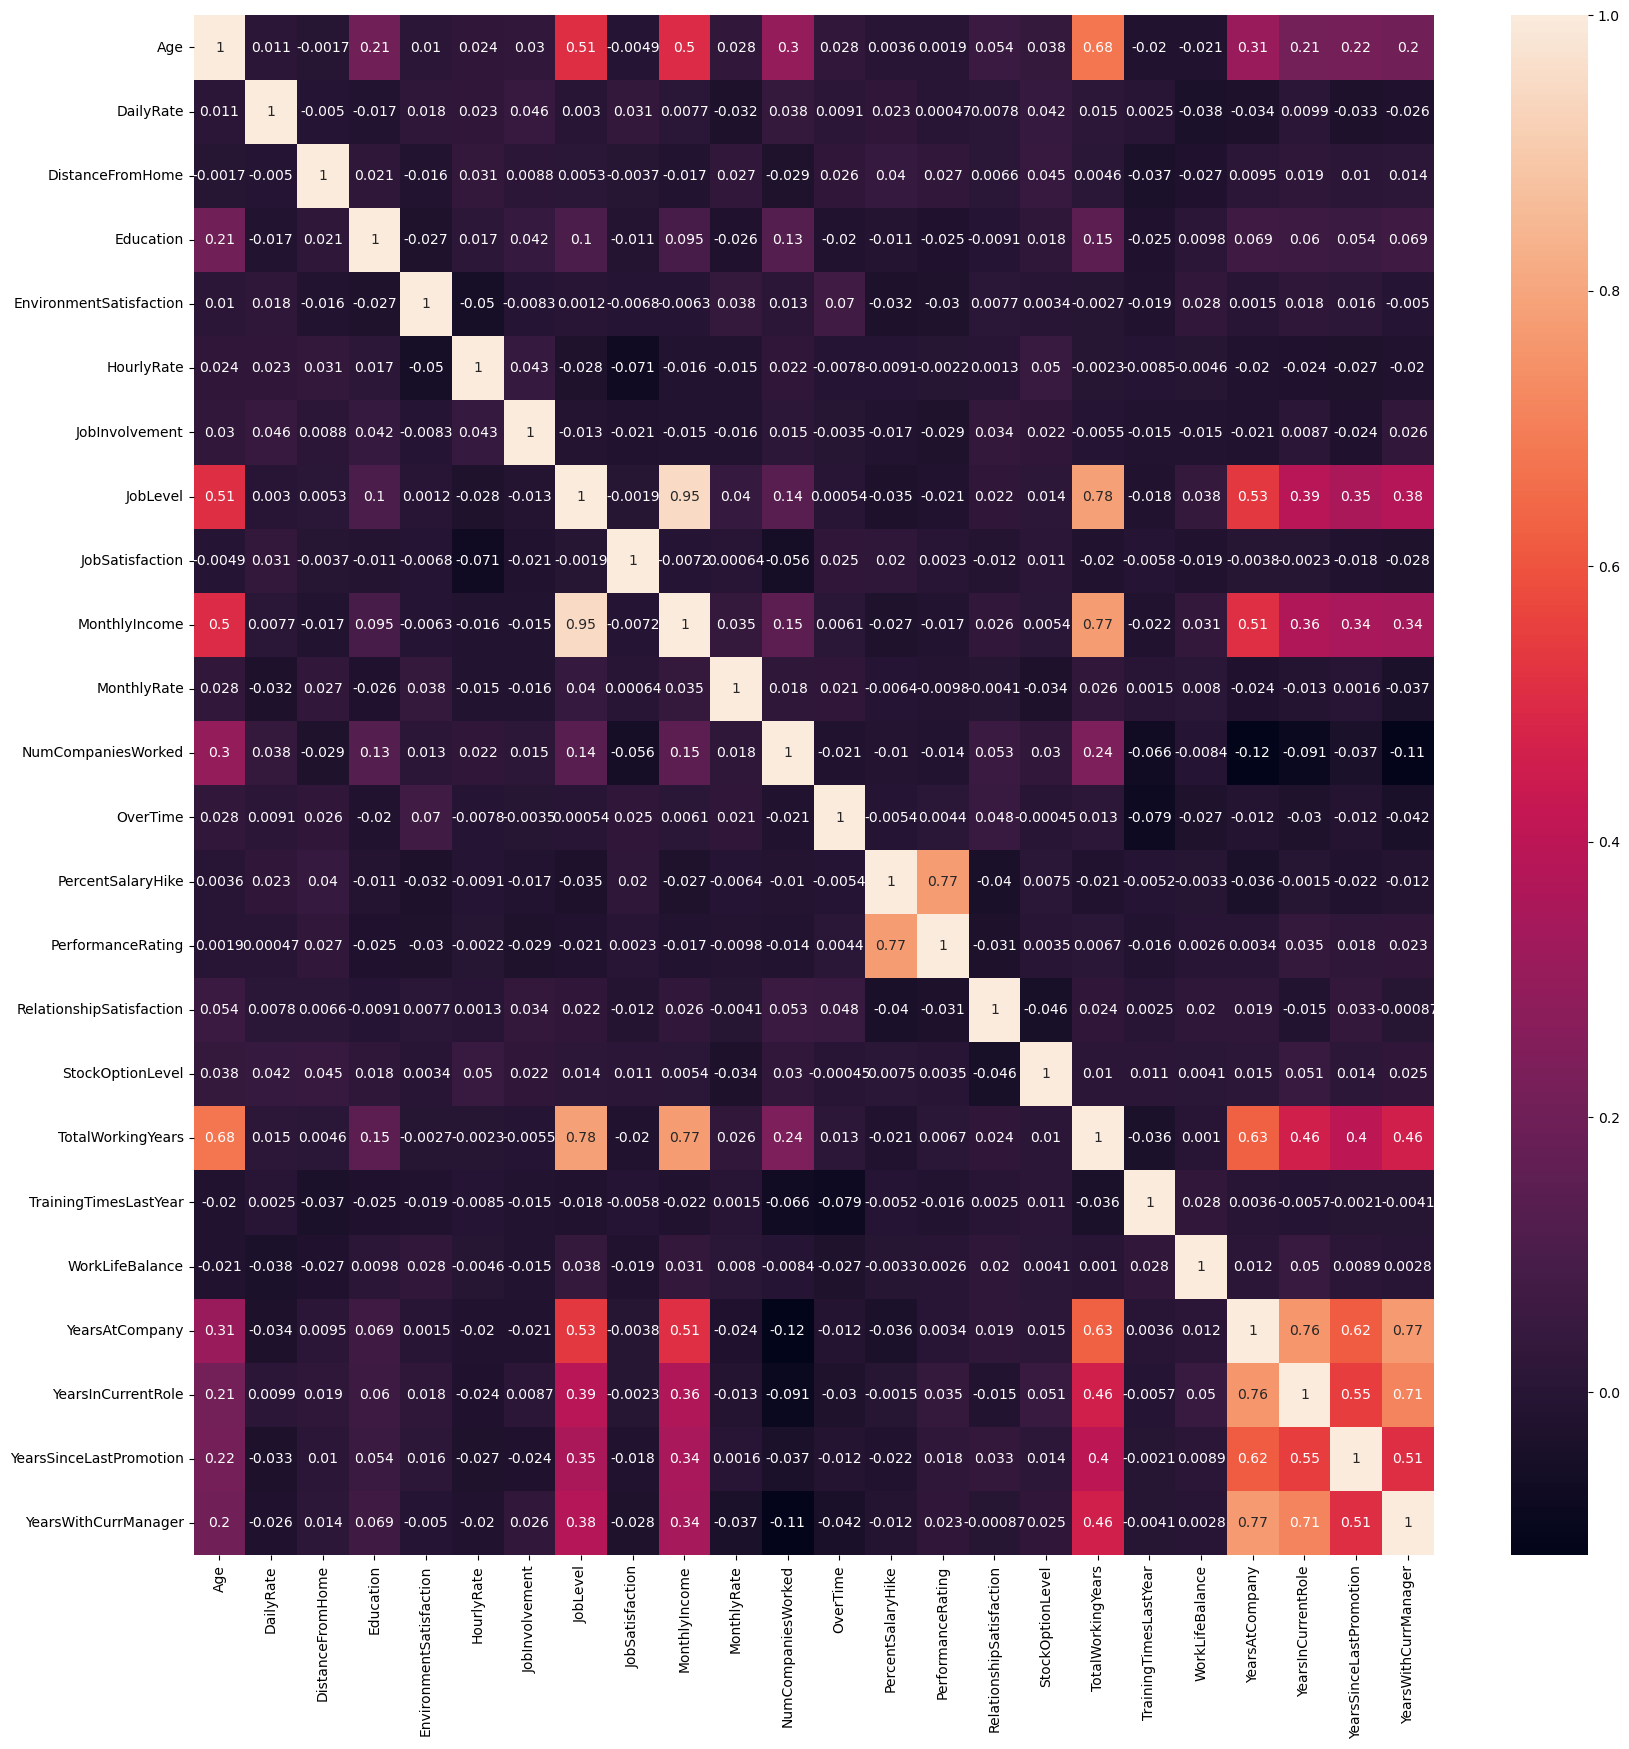

In [40]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacion, annot = True)

### Análisis de Correlación de Variables

El gráfico muestra que los ingresos (MonthlyIncome) guardan una fuerte relación con la experiencia (TotalWorkingYears) y el nivel jerárquico (JobLevel). A su vez, las variables ligadas al tiempo en la empresa (YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion) se encuentran altamente correlacionadas entre sí, reflejando trayectorias laborales consistentes.

En contraste, variables como DailyRate, HourlyRate y MonthlyRate no presentan correlaciones relevantes.
Los indicadores de satisfacción y la variable OverTime muestran correlaciones bajas, lo que indica que responden más a percepciones individuales que a factores estructurales.

Conclusión: las correlaciones más fuertes se concentran en variables de experiencia, ingresos y jerarquía, mientras que la satisfacción laboral opera de manera independiente, aportando una dimensión distinta en el análisis de rotación.

In [41]:
df.corr()

C:\Users\pim\AppData\Local\Temp\ipykernel_11164\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Axes: xlabel='Age', ylabel='count'>

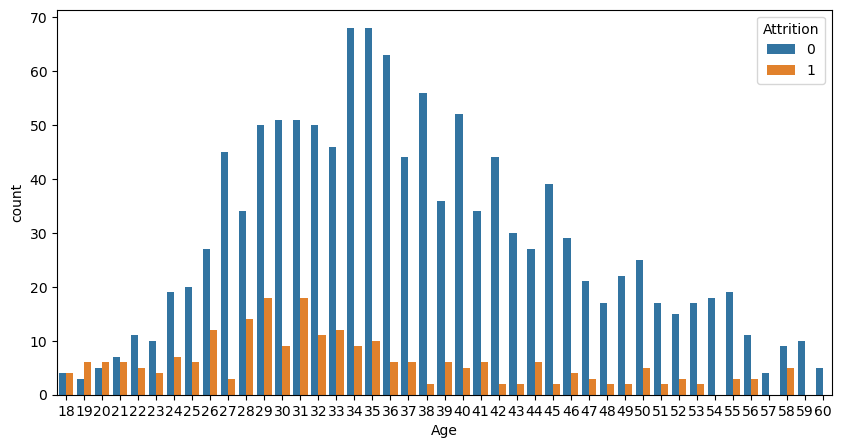

In [42]:
plt.figure(figsize = [10,5])
sns.countplot(x = 'Age', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

La mayoría de los empleados se concentra entre 25 y 45 años, con un pico en los 30-35 años. La rotación es más alta en los empleados jóvenes (25-35 años), mientras que a partir de los 40 años se observa mayor estabilidad laboral.
Los picos de rotación se dan en edades puntuales como 29-31 y 35-36 años.
Esto sugiere que las estrategias de retención deben enfocarse principalmente en los empleados más jóvenes, analizando las causas de su salida para implementar medidas efectivas.

<Axes: xlabel='JobRole', ylabel='count'>

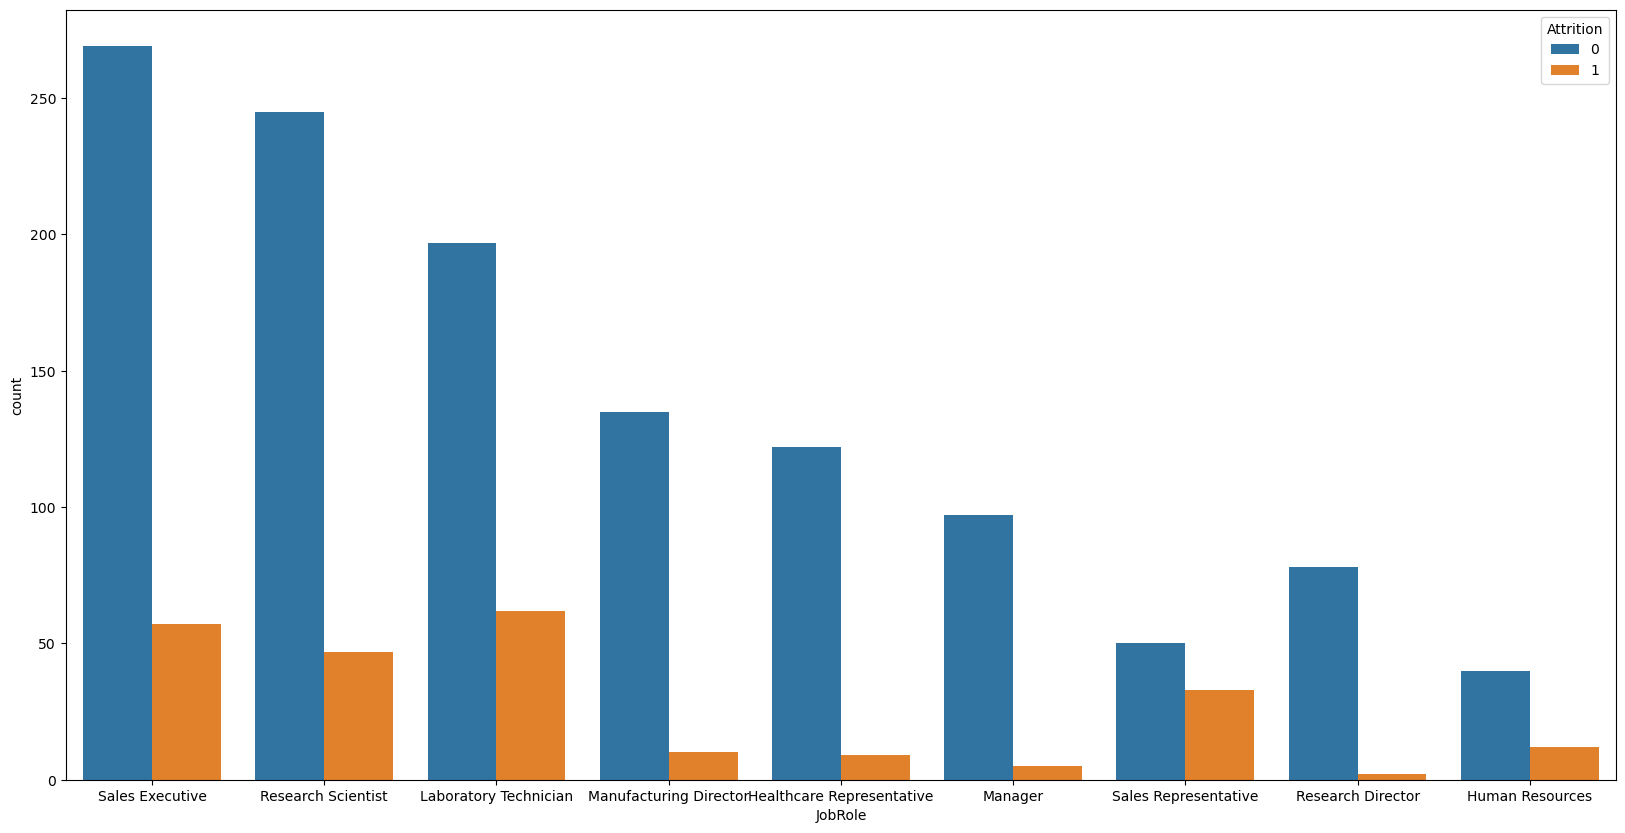

In [43]:
plt.figure(figsize = [20,10])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = pd.concat([df, y], axis = 1))


El gráfico muestra que Laboratory Technician es el puesto con mayor rotación, seguido por Sales Executive y Research Scientist. En términos proporcionales, Sales Representative también presenta una tasa alta de rotación, pese a tener pocos empleados. En contraste, roles como Manager y Research Director exhiben muy baja rotación, indicando mayor estabilidad laboral.

<Axes: xlabel='MaritalStatus', ylabel='count'>

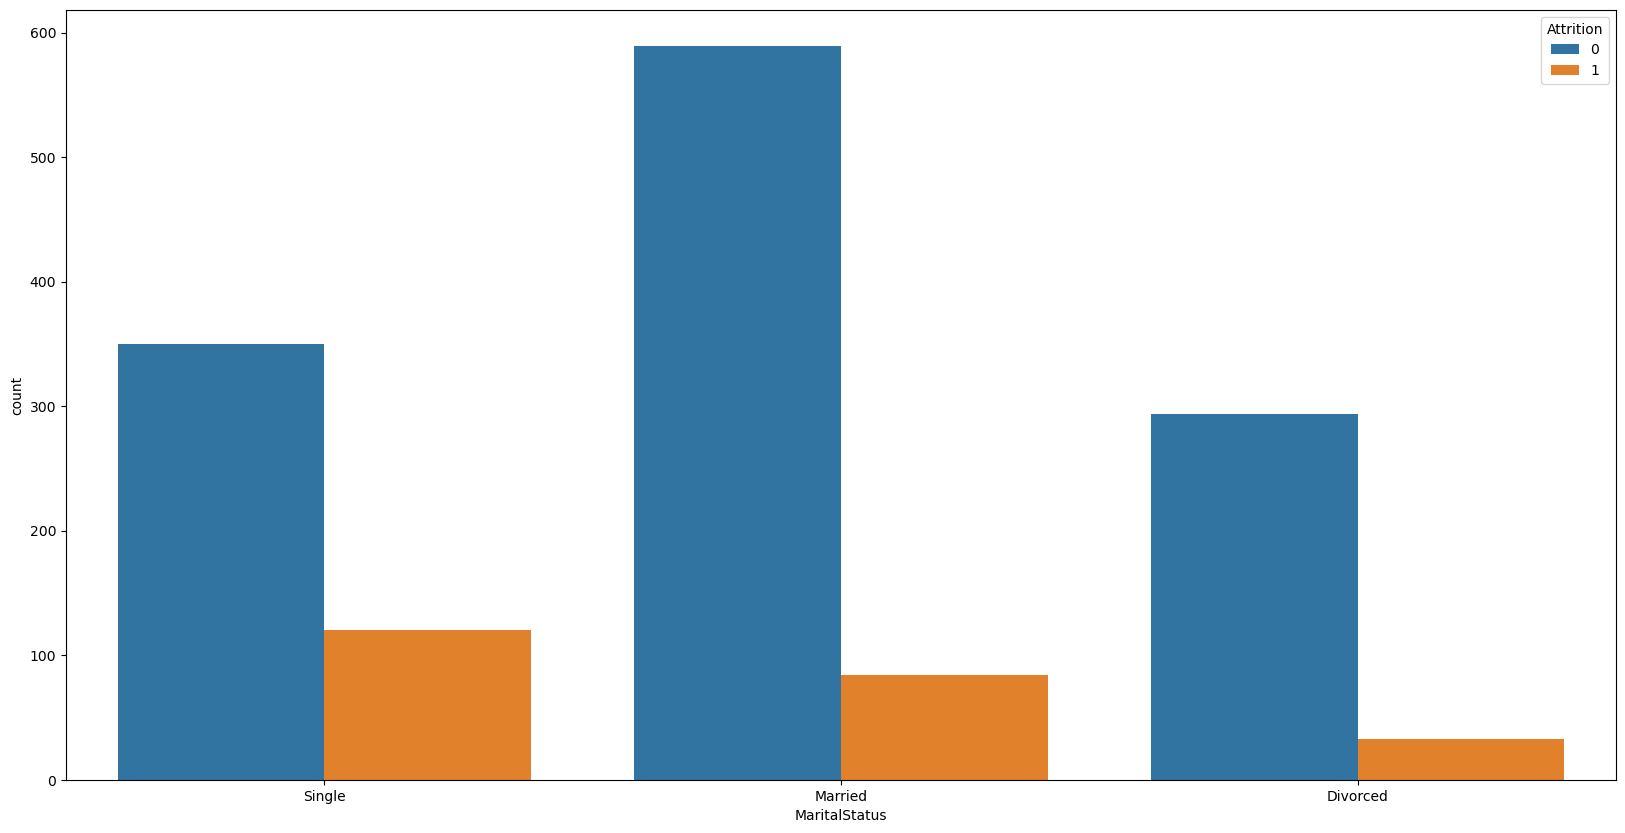

In [44]:
plt.figure(figsize = [20,10])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

Relación entre estado civil y rotación de empleados

El gráfico muestra cómo varía la rotación (Attrition) según el estado civil.

🔹 Married (casados): Son el grupo más numeroso y presentan la menor rotación relativa, lo que sugiere mayor estabilidad laboral.
🔹 Single (solteros): Exhiben la mayor proporción de rotación, siendo el grupo más propenso a dejar la empresa.
🔹 Divorced (divorciados): Su rotación es intermedia, menor que la de los solteros pero mayor que la de los casados.

Implicaciones: Las estrategias de retención deberían enfocarse en los empleados solteros, entendiendo mejor sus motivaciones y ofreciendo beneficios o condiciones más atractivas para reducir la rotación.

<Axes: xlabel='Education', ylabel='count'>

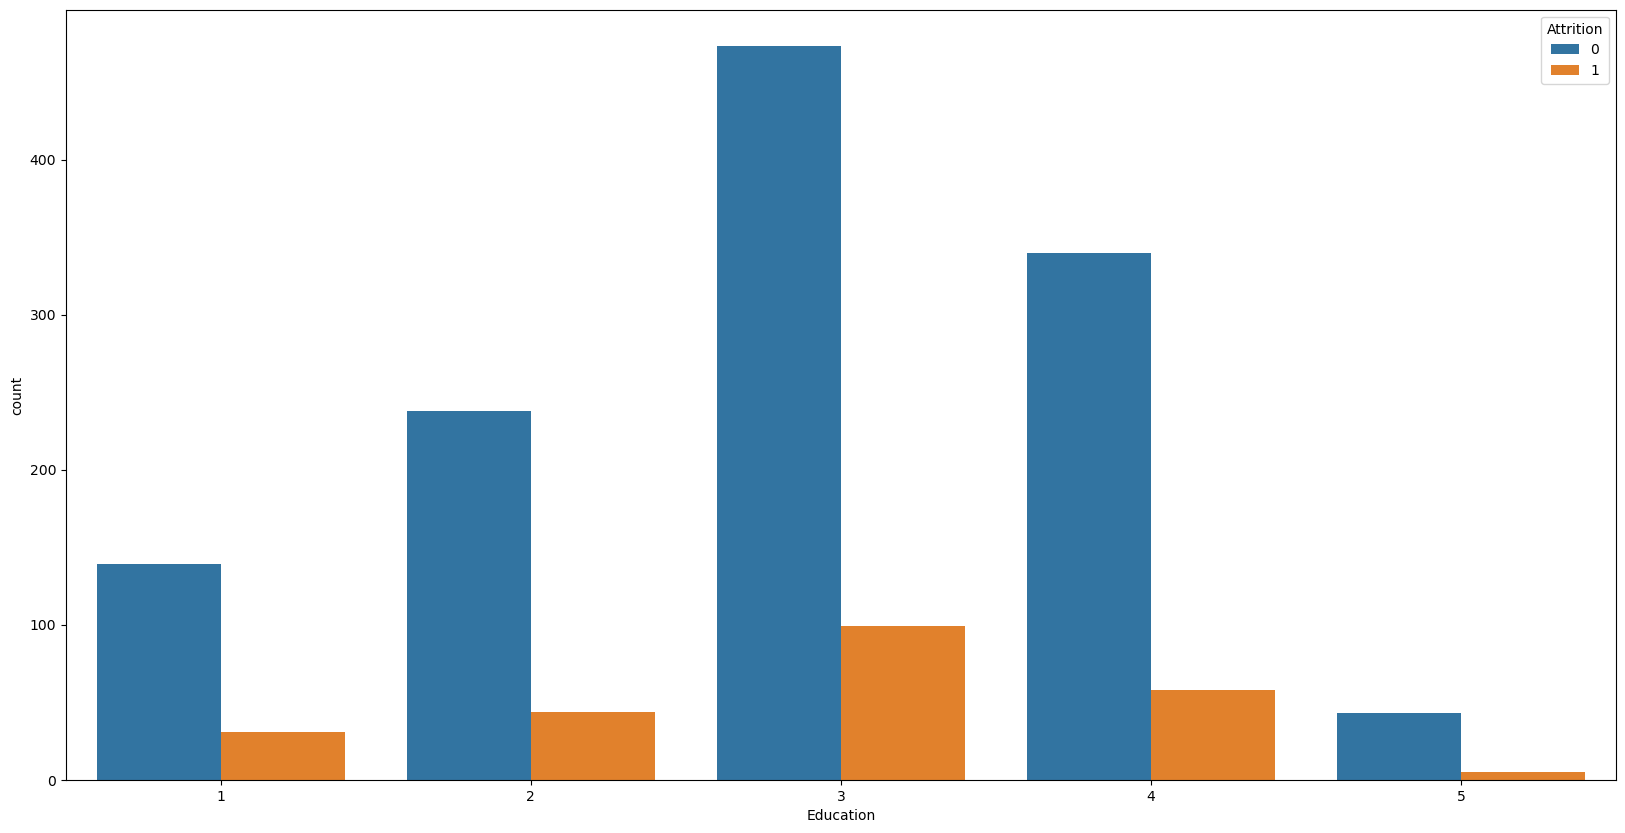

In [45]:
plt.figure(figsize = [20,10])
sns.countplot(x = 'Education', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

El gráfico evidencia que los niveles educativos 3 y 4 concentran la mayor cantidad de empleados, siendo también en el nivel 3 donde se observa la rotación más significativa. El nivel 2, aunque con menos personal, muestra una proporción relativamente alta de abandonos. En contraste, los niveles extremos (1 y 5) presentan muy baja rotación, casi nula en el nivel 5.

Conclusión: La rotación se concentra principalmente en empleados con educación intermedia, lo que sugiere la necesidad de revisar políticas de retención y desarrollo enfocadas en estos grupos.

C:\Users\pim\AppData\Local\Temp\ipykernel_11164\867728640.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_abandonan['DistanceFromHome'], label = "Personas que abandonan", color = 'r', shade = True)
C:\Users\pim\AppData\Local\Temp\ipykernel_11164\867728640.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_quedan['DistanceFromHome'], label = "Personas que se quedan", color = 'b', shade = True)


<Axes: xlabel='DistanceFromHome', ylabel='Density'>

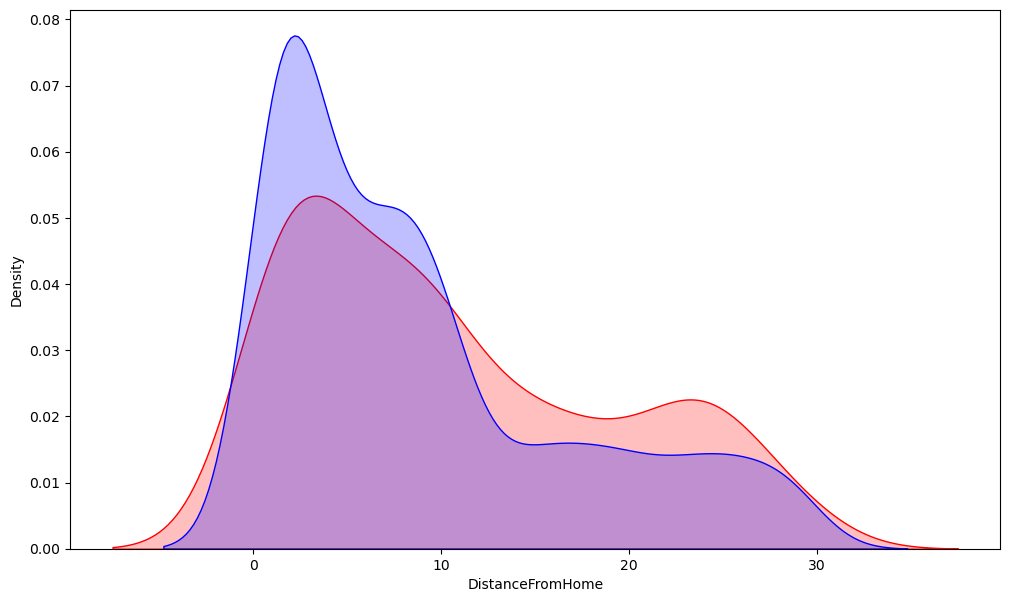

In [46]:
# calcular la distancia de los hogares 
plt.figure(figsize = [12,7])
sns.kdeplot(df_abandonan['DistanceFromHome'], label = "Personas que abandonan", color = 'r', shade = True)
sns.kdeplot(df_quedan['DistanceFromHome'], label = "Personas que se quedan", color = 'b', shade = True)

### Rotación y Distancia desde Casa

El gráfico de densidad kernel (KDE) representa la distribución de la variable DistanceFromHome según el estado de rotación de los empleados (Attrition). La curva azul corresponde a empleados que permanecieron en la empresa (0) y la roja a los que rotaron (1).

### Observaciones Principales

* Ambas distribuciones son asimétricas hacia la derecha, lo que indica que la mayoría de los empleados vive cerca de la oficina.
* Los empleados que no rotaron presentan un pico más pronunciado en distancias cortas (1-2 unidades), evidenciando mayor concentración en proximidad al lugar de trabajo.
* Los empleados que rotaron muestran mayor densidad en distancias intermedias y largas (10-28 unidades), lo que sugiere que vivir más lejos se asocia con mayor probabilidad de rotación.

### Implicaciones

La distancia desde casa influye en la retención laboral. Los empleados que viven más lejos tienden a abandonar la empresa, mientras que quienes viven cerca permanecen con mayor frecuencia. Se recomienda considerar políticas de apoyo, como transporte corporativo, flexibilidad horaria o esquemas de trabajo remoto, para mitigar el impacto de la distancia en la rotación.

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

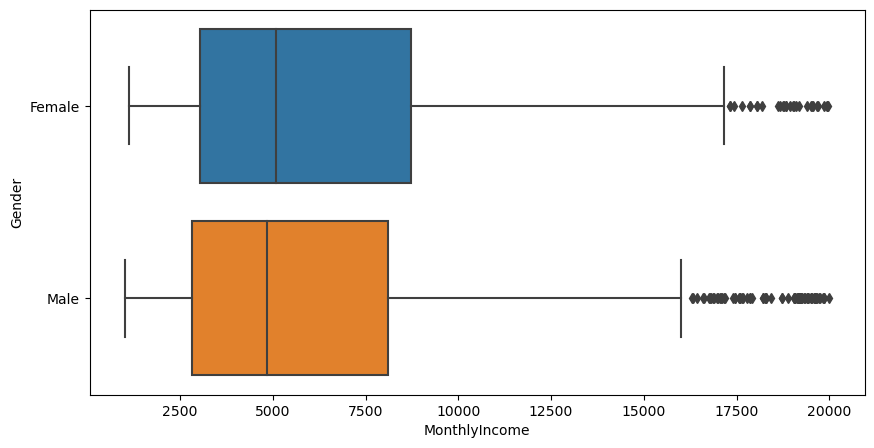

In [47]:
plt.figure(figsize = [10,5])
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)

Distribución de Ingreso Mensual por Género

El boxplot compara ingresos mensuales entre empleados masculinos y femeninos, mostrando sesgo positivo en ambos casos, con la mayoría percibiendo ingresos bajos y algunos outliers elevados.

Observaciones:

Mediana femenina: 5.000–6.000; masculina: 5.500–6.500.

Rango intercuartílico similar, ligeramente mayor en hombres.

Numerosos outliers en ambos géneros, indicando empleados con ingresos significativamente altos.

Implicaciones: La distribución de ingresos es comparable entre géneros, con diferencias marginales. La presencia de outliers sugiere oportunidades de altos ingresos para todos. Para evaluar equidad salarial se necesitarían análisis estadísticos adicionales.

In [48]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

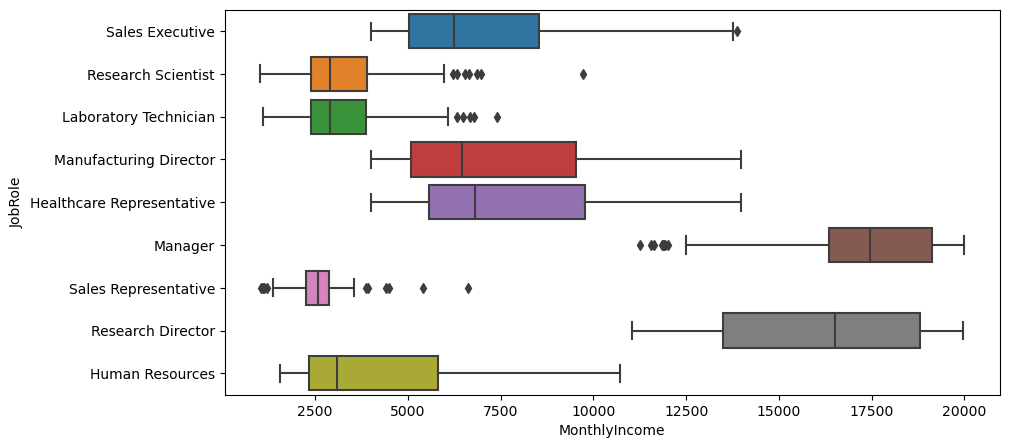

In [49]:
plt.figure(figsize = [10,5])
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

El boxplot muestra la mediana, dispersión y valores atípicos del ingreso mensual según cada puesto. Los roles con ingresos más bajos y concentrados son Sales Representative y Laboratory Technician, mientras que Manager y Research Director presentan medianas altas y amplia dispersión. Algunos puestos muestran outliers con ingresos significativamente mayores.

Implicaciones: Este análisis ayuda a comprender la estructura salarial, identificar diferencias entre roles y apoyar decisiones de compensación, negociación y planificación de talento, considerando experiencia, antigüedad y nivel de responsabilidad.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [51]:
# creamos una tabla con las variables categoricas
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [52]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
# creamos una tabla con las variables numericas eliminando las variables categoricas
ohe = OneHotEncoder()
X_cat = ohe.fit_transform(X_cat).toarray()

In [55]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [56]:
X_cat = pd.DataFrame(X_cat)

In [57]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
# creamos una tabla con las variables numericas eliminando las variables categoricas
X_num = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1)

In [59]:
X_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [60]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [62]:
tmp = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1)

In [63]:
tmp

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [64]:
tmp.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Has normalizado exitosamente tus datos numéricos X_num utilizando MinMaxScaler, transformándolos en un array donde todos los valores están entre 0 y 1. Esto prepara tus datos para una etapa posterior de modelado, asegurando que ninguna característica domine el proceso de aprendizaje debido a su magnitud original.

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)

In [66]:
X_num

array([[0.54761905, 0.71581961, 0.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.12670007, 0.25      , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 0.37652112, 0.25      , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [67]:
X_num = pd.DataFrame(X_num, columns = tmp.columns)

In [68]:
X_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [69]:
X_num.reset_index()
X_cat.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [70]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [71]:
X_cat.reset_index()
X_num.reset_index()

,index,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [72]:
X_all = pd.concat([X_num, X_cat], axis = 1)

In [73]:
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


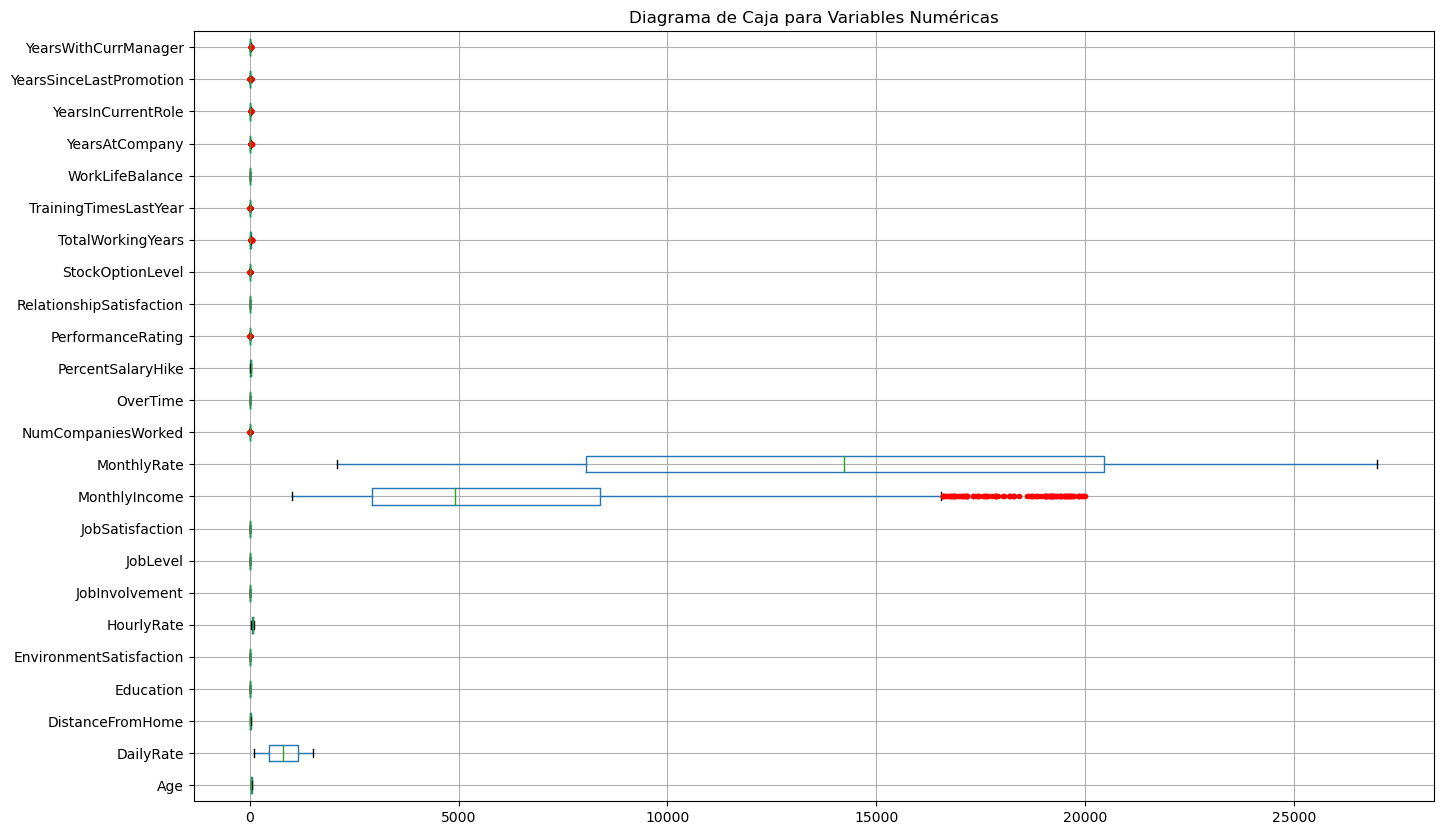

In [74]:
plt.figure(figsize=(16, 10))
df.boxplot(sym='r.', vert=False)
plt.title('Diagrama de Caja para Variables Numéricas')
plt.show()

El boxplot muestra la dispersión, mediana y valores atípicos de las variables numéricas. Variables como MonthlyIncome, MonthlyRate y TotalWorkingYears presentan gran variabilidad y outliers, mientras que otras como JobLevel, JobSatisfaction y OverTime tienen rangos más concentrados. Las variables de antigüedad (YearsAtCompany, YearsInCurrentRole, etc.) muestran sesgo a la derecha. Estas observaciones ayudan a identificar variables clave para el modelado y posibles problemas de datos.

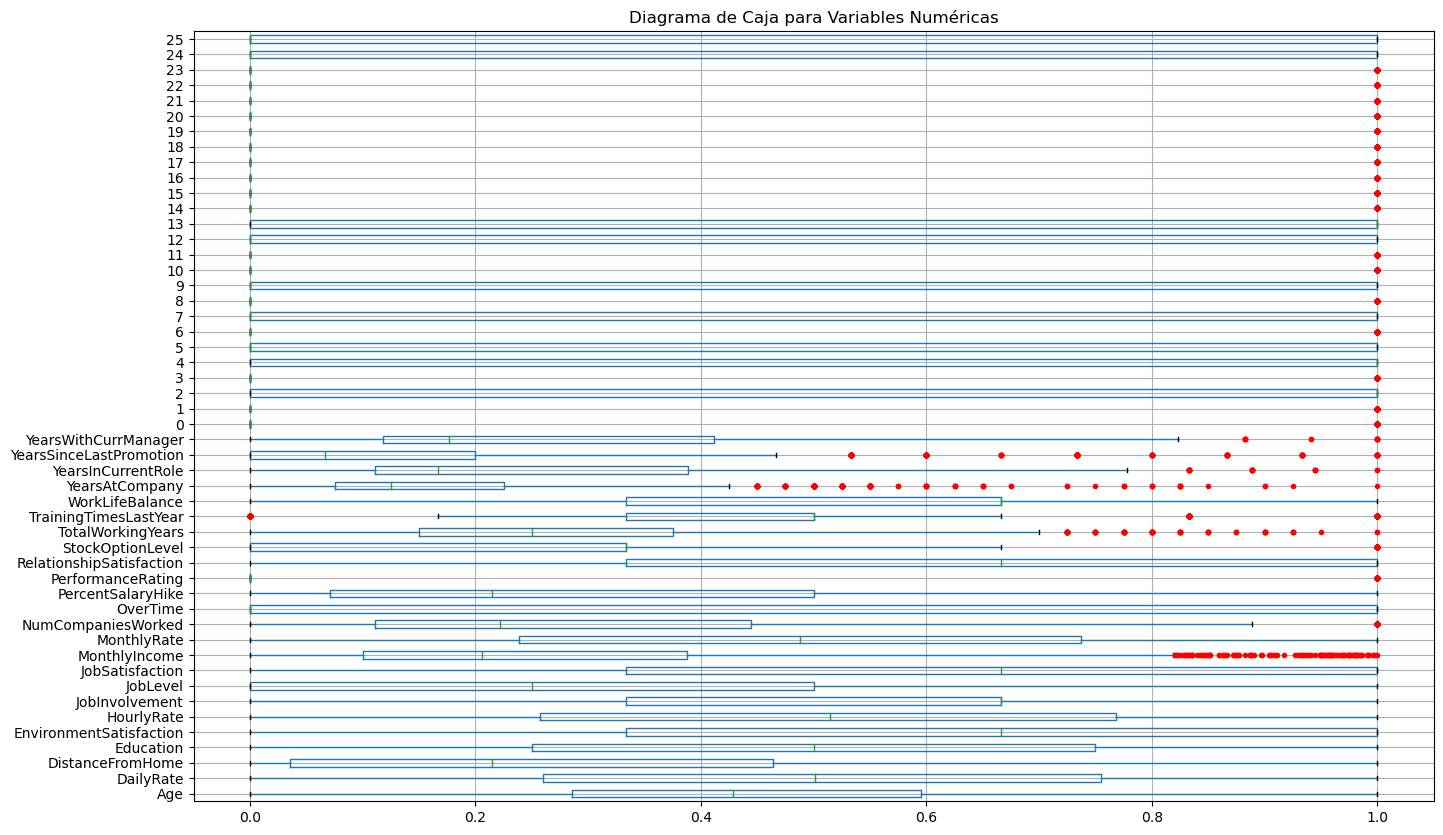

In [75]:
plt.figure(figsize=(16, 10))
X_all.boxplot(sym='r.', vert=False)
plt.title('Diagrama de Caja para Variables Numéricas')
plt.show()

El boxplot muestra las distribuciones de variables numéricas escaladas entre 0 y 1. Variables como MonthlyIncome, MonthlyRate, TotalWorkingYears y YearsAtCompany mantienen alta dispersión y presentan outliers, mientras que variables binarias o de rango limitado (Gender, OverTime, PerformanceRating) aparecen concentradas. La normalización permite comparar todas las variables en la misma escala y resalta los valores atípicos que pueden influir en modelos de machine learning.

## Conclusiones

* La rotación es más frecuente en empleados jóvenes, solteros y en ciertos roles específicos.
*  Factores como distancia desde el hogar y nivel educativo intermedio están asociados a mayor abandono.
* Puestos directivos y estratégicos presentan mayor estabilidad.
* Los insights permiten diseñar políticas de retención proactivas y dirigidas a los grupos de mayor riesgo.

## Próximos Pasos

* Entrenamiento de modelos predictivos (Regresión Logística, Random Forest, XGBoost) para estimar la probabilidad de rotación.
* Evaluación de modelos con métricas como Accuracy, F1-Score y AUC.
* Creación de dashboards para monitoreo continuo de rotación y estrategias de retención.